In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris_features = iris.feature_names

In [5]:
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])
data=pd.concat([df_data,df_labels],axis=1)

In [7]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])
data=pd.concat([df_data,df_labels],axis=1)

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
#Splitting the data into training and test test
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
# number of samples / number of time steps chosen per sample , number of parallel time series or features

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [12]:
X.shape

(150, 4, 1)

In [13]:
n_steps = X.shape[1]
n_steps

4

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [15]:
def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()    

input_shape =>  4 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                    

In [16]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=16,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
     

Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 1.0996 - accuracy: 0.4333 - val_loss: 1.0871 - val_accuracy: 0.2000
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0210 - accuracy: 0.3667 - val_loss: 1.0494 - val_accuracy: 0.2000
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.9581 - accuracy: 0.6000 - val_loss: 0.9679 - val_accuracy: 0.5667
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8773 - accuracy: 0.6917 - val_loss: 0.8753 - val_accuracy: 0.5667
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7968 - accuracy: 0.6917 - val_loss: 0.8114 - val_accuracy: 0.5667
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7076 - accuracy: 0.6917 - val_loss: 0.7012 - val_accuracy: 0.5667
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6203 - accuracy: 0.7250 - val_loss: 0.6272 - val_accuracy: 0.6667
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.1287 - accuracy: 0.9500 - val_loss: 0.0965 - val_accuracy: 0.9667
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1375 - accuracy: 0.9583 - val_loss: 0.1684 - val_accuracy: 0.9000
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1277 - accuracy: 0.9583 - val_loss: 0.1019 - val_accuracy: 0.9667
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1299 - accuracy: 0.9583 - val_loss: 0.1216 - val_accuracy: 0.9667
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1255 - accuracy: 0.9667 - val_loss: 0.1067 - val_accuracy: 0.9667
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1292 - accuracy: 0.9500 - val_loss: 0.1412 - val_accuracy: 0.9333
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1220 - accuracy: 0.9667 - val_loss: 0.0938 - val_accuracy: 0.9667
Epoch 66/100
8/8 [===============

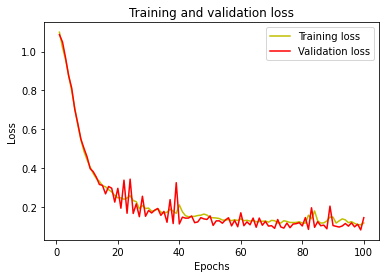

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()     

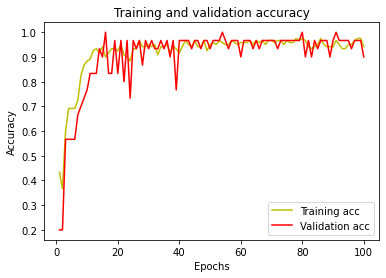

In [18]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
